### INF 510 Fall 2020 Final Project Submission

1.	**Your name**
    
    Junhyoung Seo

2. **Any major "gotchas" to the code (i.e. things that don't work, go slowly, could be improved, etc.)**

    When running the file JUNHYOUNG_SEO_proj2.py, it did not take a long time to extract data via web web-scraping and using google_geolocation API; however, it took a long time to extract data using weather API. I think I can optimize my coding a little more to reduce the response time of this API.
    
    Also, I scraped all the match results provided by the BBC sport webpage, but I felt that my data amount was small to show valid results during this data analysis. Therefore, if older Premier Leauge match data can be added, this project can proceed with meaningful analysis.


3. **Any libraries that need to be installed to run your code (see above)**

    pandas, seaborn, requests, re, bs4, json, and datetime library

4. **Anything else you feel is relevent to the grading of your project**

    At first, I simply tried to analyze the weather and the number of goals, but as I proceeded with the data analysis, I was curious about the correlation between wind speed, humidity, temperature and the number of goals, so I modified the scraper a little bit. In milestone2, weather API simply brings weather, but I added code to bring temperature, wind speed, and humidity to weather data, which can be checked through the attached csv file.

5. **What did you set out to study? (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    The purpose of the study was to identify the correlation between weather and the number of goals scored in soccer matches. As a soccer player, I felt that it was hard to score a goal in rainy weather, so I thought there must be a correlation. 
    
    Because weather could not be quantified, the average number of goals for each category was calculated and visualized by a bar chart, and the correlation coefficient between wind speed, humidity, temperature and total number of goals was calculated and each regression model was visualized on the chart. 

6. **What did you Discover/what were your conclusions (i.e. what were your findings? Were your original assumptions confirmed, etc.?)**

    For the correlation test, three methods were used: Pears, Kendall, Spearman, the largest value of the correlation coefficient is as follows:
    
    temperature - total goals : 0.037667
    
    humidity - total goals : -0.078114
    
    wind speed - total goals : -0.021495
    
    These values are the largest of the three methods, but they are too small to verify the correlation between the two variables.
    
    Thus, my conclusion is that wind speed, humidity, and temperature have no significant correlation with total goals in soccer matches.
    
    The bottom bar chart indicates the average number of goals by weather. 'Thunder' category should be excluded because the number of data is two. The average number of goals when the weather is 'shower' is higher than when the weather is 'clear'. This also indicates that my prediction is not valid.
    
    Maybe the number of goals has to do with the strength of team squad....
    

    

7. **What difficulties did you have in completing the proejct?**

    Firstly, It was difficult to determine which statistical tests to proceed with. Because the class was focused on how to code the process of obtaining data through web-scraping and API, I didn't know what statistical tests to run on the final data, what statistical results to derive, so I had to study more regarding them.
    
    Also, there were many errors in coding the scrapper, and it was difficult to correct the code through numerous trial and error, and to deal with exception handling.
    
    Lastly, It was hard for me to find the result too different from my expectation. I expected that the weather and the number of goals would be somewhat correlated, but I was disappointed that I could not find any correlation. Perhaps I can do a more effective analysis by increasing the size of the data.

8. **What skills did you wish you had while you were doing the project?**

    To be honest, it was really hard to extract the desired data at the web-scaping stage and I had almost given up. I just wanted to extract the number of goals and the name of the home team from the web page; however, it was challenging to detect only the values I wanted in the html structure. Therefore, during the project, I wanted to have the ability to quickly find only the results I wanted in the html structure and dataize them.


9. **What would you do "next" to expand or augment the project?**

    As I said above, I would like to analyze data by adding older past data. Also, I would like to further analyze the correlation between the number of goals and the stadium.


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# call the data
match_data = pd.read_csv('match_data.csv')
geocode_data = pd.read_csv('geocode_data.csv')
weather_data = pd.read_csv('weather_data.csv')
final_data = pd.read_csv('final_data.csv')

In [3]:
# remove meaningless column
del match_data['Unnamed: 0']
del geocode_data['Unnamed: 0']
del weather_data['Unnamed: 0']
del final_data ['Unnamed: 0']

In [4]:
# let's look into match data
match_data[:10]

,match_date,home_team,total_goals
0,2019/12/29,Arsenal,3
1,2019/12/29,Liverpool,1
2,2019/12/29,Manchester City,2
3,2019/12/28,Brighton & Hove Albion,2
4,2019/12/28,Newcastle United,3
5,2019/12/28,Southampton,2
6,2019/12/28,Watford,3
7,2019/12/28,Norwich City,4
8,2019/12/28,West Ham United,3
9,2019/12/28,Burnley,2


In [5]:
# let's look into geocode data
geocode_data[:10]

,team_name,stadium,lat/long
0,Arsenal,Emirates Stadium,"(51.5548885, -0.108438)"
1,Aston Villa,Villa Park,"(41.8897519, -87.98895429999999)"
2,Brighton & Hove Albion,Falmer Stadium,"(50.8615651, -0.0837163)"
3,Burnley,Turf Moor,"(53.7886839, -2.2303478)"
4,Chelsea,Stamford Bridge,"(51.481663, -0.1909565)"
5,Crystal Palace,Selhurst Park,"(51.39797429999999, -0.0860576)"
6,Everton,Goodison Park,"(53.438787, -2.9663193)"
7,Fulham,Craven Cottage,"(51.4748946, -0.2217799)"
8,Leeds United,Elland Road,"(53.7778162, -1.5721446)"
9,Leicester City,King Power Stadium,"(52.6203662, -1.1421895)"


In [6]:
# let's look into weather data
weather_data[:10]

,lat/long,woeid,date,weather,temperature,wind_speed,humidity
0,"51.5548885,-0.108438",44418,2019/12/29,Light Cloud,7.335,4.667821,83
1,"53.4308294,-2.96083",26734,2019/12/29,Heavy Cloud,7.960,7.458091,89
2,"53.48313810000001,-2.2003953",28218,2019/12/29,Heavy Cloud,6.165,4.484736,84
3,"50.8615651,-0.0837163",13911,2019/12/28,Heavy Cloud,8.750,5.568398,90
4,"40.86502369999999,-73.89777269999999",2459115,2019/12/28,Heavy Cloud,7.090,4.056700,69
5,"37.8416782,-122.1055344",2463583,2019/12/28,Clear,13.880,1.837823,62
6,"51.6499059,-0.401525",44418,2019/12/28,Heavy Cloud,8.740,3.352007,87
7,"52.6221535,1.3093062",30704,2019/12/28,Heavy Cloud,8.290,5.975138,89
8,"51.5387095,-0.0166037",44418,2019/12/28,Heavy Cloud,8.740,3.352007,87
9,"53.7886839,-2.2303478",13527,2019/12/28,Heavy Cloud,8.610,3.110743,88


In [7]:
# let's look into final data
final_data[:10]

,weather,temperature,wind_speed,humidity,total_goals
0,Light Cloud,7.335,4.667821,83,3
1,Heavy Cloud,7.960,7.458091,89,1
2,Heavy Cloud,6.165,4.484736,84,2
3,Heavy Cloud,8.750,5.568398,90,2
4,Heavy Cloud,7.090,4.056700,69,3
5,Clear,13.880,1.837823,62,2
6,Heavy Cloud,8.740,3.352007,87,3
7,Heavy Cloud,8.290,5.975138,89,4
8,Heavy Cloud,8.740,3.352007,87,3
9,Heavy Cloud,8.610,3.110743,88,2


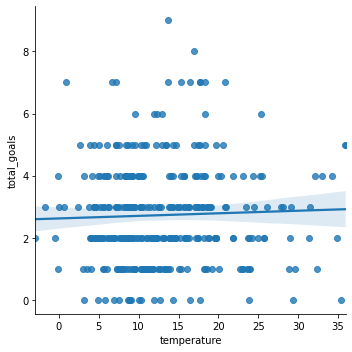

In [8]:
# Plot data and regression model / temperature - total goals
sns.lmplot(x='temperature', y='total_goals', data=final_data, fit_reg=True)

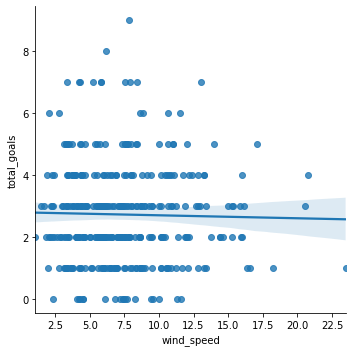

In [9]:
# Plot data and regression model / wind speed - total goals
sns.lmplot(x='wind_speed', y='total_goals', data=final_data, fit_reg=True)

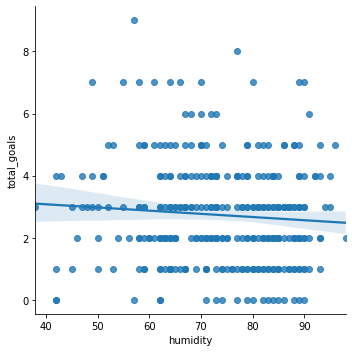

In [10]:
# Plot data and regression model / humidity - total goals
sns.lmplot(x='humidity', y='total_goals', data=final_data, fit_reg=True)

In [11]:
# Calculate the pearson correlation coefficent 
final_data.corr(method='pearson')

,temperature,wind_speed,humidity,total_goals
temperature,1.000000,-0.060573,-0.559131,0.036451
wind_speed,-0.060573,1.000000,0.003617,-0.021495
humidity,-0.559131,0.003617,1.000000,-0.078114
total_goals,0.036451,-0.021495,-0.078114,1.000000


In [12]:
# Calculate the kendall correlation coefficent 
final_data.corr(method='kendall')

,temperature,wind_speed,humidity,total_goals
temperature,1.000000,0.002575,-0.369032,0.027220
wind_speed,0.002575,1.000000,-0.034555,-0.014821
humidity,-0.369032,-0.034555,1.000000,-0.046028
total_goals,0.027220,-0.014821,-0.046028,1.000000


In [13]:
# Calculate the spearman correlation coefficent 
final_data.corr(method='spearman')

,temperature,wind_speed,humidity,total_goals
temperature,1.000000,0.023604,-0.518947,0.037667
wind_speed,0.023604,1.000000,-0.056073,-0.018211
humidity,-0.518947,-0.056073,1.000000,-0.062755
total_goals,0.037667,-0.018211,-0.062755,1.000000


In [14]:
# Average values by weather
final_visual = final_data.groupby(['weather']).mean().sort_values(by=['total_goals'])
final_visual.rename(columns = {'total_goals' : 'average_goals'}, inplace = True)
final_visual

,temperature,wind_speed,humidity,average_goals
weather,,,,
Thunder,1.667500,9.820949,72.000000,1.000000
Heavy Rain,11.061667,8.786849,81.711111,2.533333
Light Rain,12.472368,9.446621,78.947368,2.649123
Heavy Cloud,12.165706,7.386689,74.141176,2.694118
Light Cloud,13.396061,5.576665,68.121212,2.787879
Clear,17.776750,5.058983,65.150000,2.850000
Showers,13.868955,6.992050,73.119403,2.925373


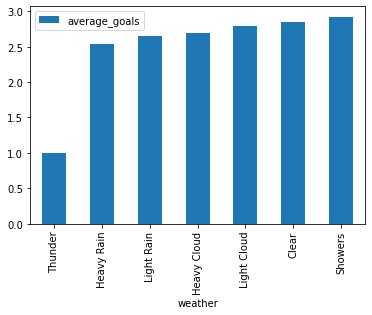

In [15]:
# Average goals by weather / bar chart
final_visual.plot.bar(y='average_goals')

In [16]:
# Let's see if each category has enough data
final_data['weather'].value_counts()

Heavy Cloud    85
Showers        67
Light Cloud    66
Light Rain     57
Heavy Rain     45
Clear          20
Thunder         2
Name: weather, dtype: int64